In [1]:
import pandas as pd

matches = pd.read_csv("matches.csv", index_col=0)

matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,2023-08-12,12:30,Premier League,Matchweek 1,Sat,Home,W,2.0,1.0,Nott'ham Forest,...,Match Report,NaN,15.0,7.0,19.1,0.0,0,0,2024,Arsenal
2,2023-08-21,20:00,Premier League,Matchweek 2,Mon,Away,W,1.0,0.0,Crystal Palace,...,Match Report,NaN,13.0,2.0,16.4,0.0,1,1,2024,Arsenal
3,2023-08-26,15:00,Premier League,Matchweek 3,Sat,Home,D,2.0,2.0,Fulham,...,Match Report,NaN,18.0,9.0,13.8,0.0,1,1,2024,Arsenal
4,2023-09-03,16:30,Premier League,Matchweek 4,Sun,Home,W,3.0,1.0,Manchester Utd,...,Match Report,NaN,17.0,5.0,15.0,0.0,0,0,2024,Arsenal
5,2023-09-17,16:30,Premier League,Matchweek 5,Sun,Away,W,1.0,0.0,Everton,...,Match Report,NaN,13.0,4.0,17.4,0.0,0,0,2024,Arsenal


In [2]:
matches.shape

(714, 27)

In [3]:
matches.columns

Index(['date', 'time', 'comp', 'round', 'day', 'venue', 'result', 'gf', 'ga',
       'opponent', 'xg', 'xga', 'poss', 'attendance', 'captain', 'formation',
       'referee', 'match report', 'notes', 'sh', 'sot', 'dist', 'fk', 'pk',
       'pkatt', 'season', 'team'],
      dtype='object')

In [4]:
matches['formation'].value_counts()

4-2-3-1       279
4-3-3         162
3-4-3          84
4-4-2          51
3-5-2          40
4-4-1-1        39
4-1-4-1        18
5-4-1          10
3-2-4-1         9
5-3-2           8
4-5-1           3
4-1-2-1-2◆      2
4-2-4-0         2
3-4-1-2         2
3-5-1-1         2
4-3-2-1         1
4-2-2-2         1
4-3-1-2         1
Name: formation, dtype: int64

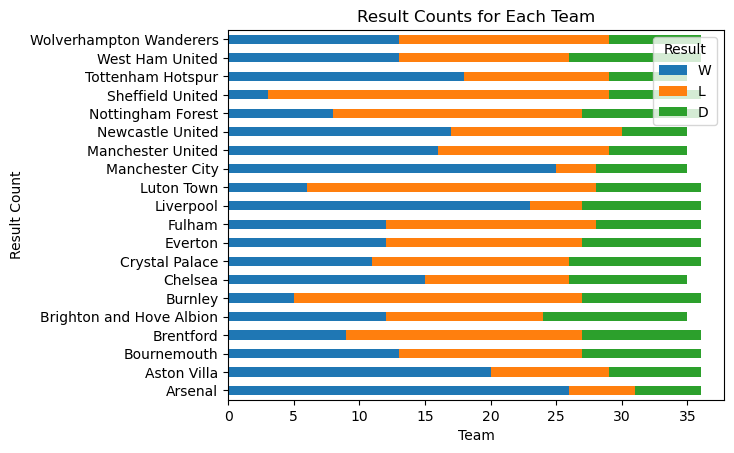

In [5]:
import matplotlib.pyplot as plt

resultCounts = matches.groupby(['team', 'result']).size().unstack(fill_value = 0)
resultOrder = ['W', 'L', 'D']
resultCounts = resultCounts.reindex(columns = resultOrder)

resultCounts.plot(kind='barh', stacked=True)
plt.xlabel('Team')
plt.ylabel('Result Count')
plt.title('Result Counts for Each Team')
plt.legend(title='Result')

#plt.legend(title='Result')
plt.show()

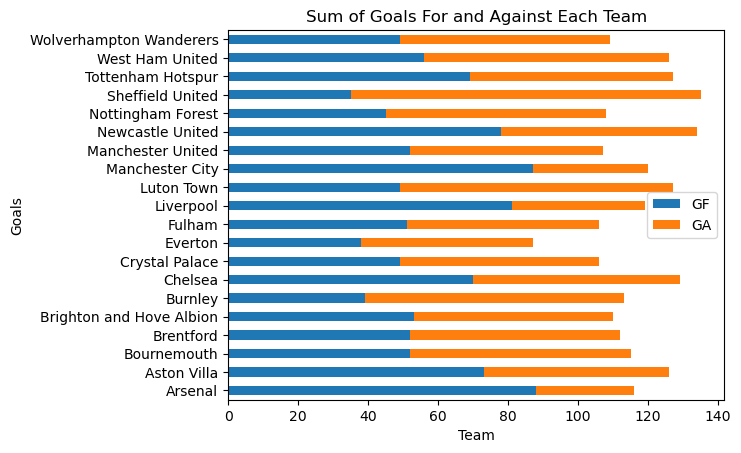

In [6]:
teamGoals = matches.groupby('team').agg({'gf': 'sum', 'ga': 'sum'})

teamGoals.plot(kind='barh', stacked=True)
plt.xlabel('Team')
plt.ylabel('Goals')
plt.title('Sum of Goals For and Against Each Team')
plt.legend(['GF', 'GA'])
plt.show()

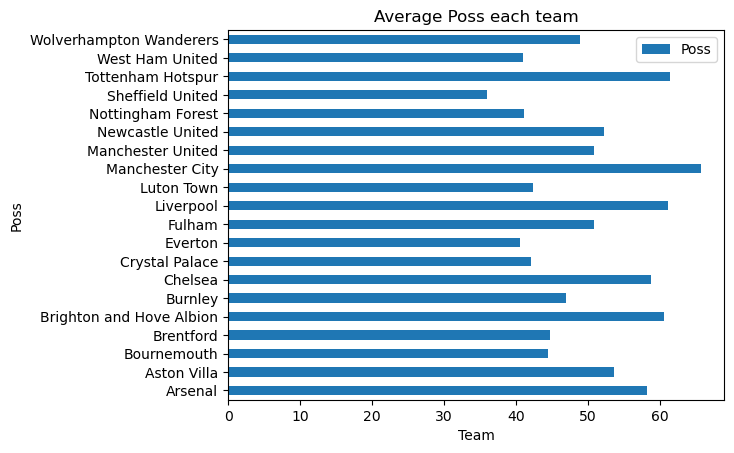

In [7]:
averagePoss = matches.groupby('team').agg({'poss': 'mean'})

averagePoss.plot(kind='barh', stacked=True)
plt.xlabel('Team')
plt.ylabel('Poss')
plt.title('Average Poss each team')
plt.legend(['Poss'])
plt.show()

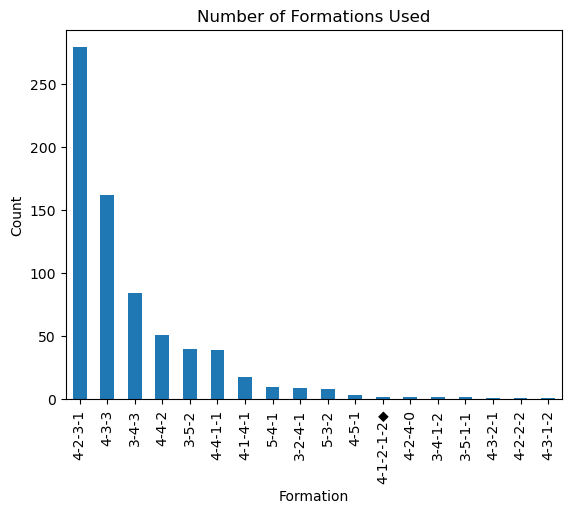

In [8]:
formationCounts = matches['formation'].value_counts()

# Plot the number of formations used by each formation as a stacked bar chart
formationCounts.plot(kind='bar')
plt.xlabel('Formation')
plt.ylabel('Count')
plt.title('Number of Formations Used')
plt.show()

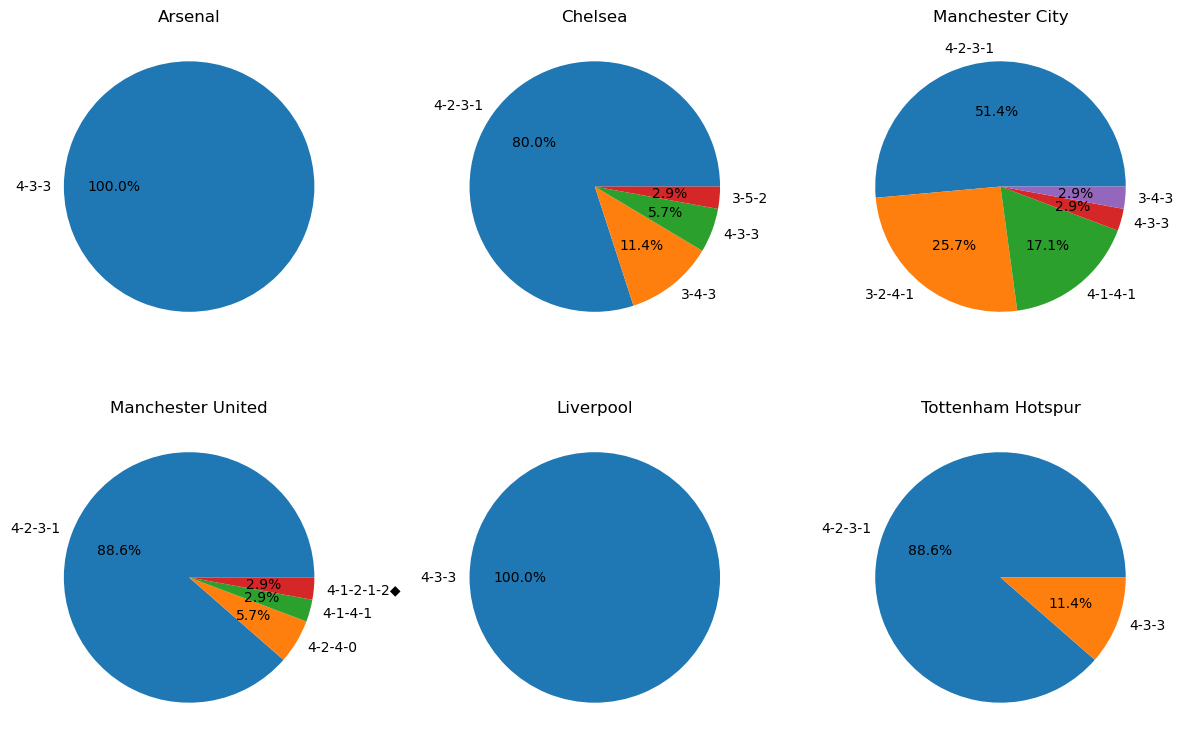

In [48]:
teams = ['Arsenal', 'Chelsea', 'Manchester City', 'Manchester United', 'Liverpool', 'Tottenham Hotspur']

# Create a 2x3 subplot grid for the pie charts
fig, ax = plt.subplots(2, 3, figsize=(12, 8))

# Flatten the axes array
ax = ax.flatten()

for i, team in enumerate(teams):
    # Filter the dataframe for the current team
    teamData = matches[matches['team'] == team]
    
    # Count the occurrences of each formation
    formationCounts = teamData['formation'].value_counts()
    
    # Plot the pie chart of formation used by the current team
    ax[i].pie(formationCounts, labels=formationCounts.index, autopct='%1.1f%%')
    ax[i].set_title(f'{team}')

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

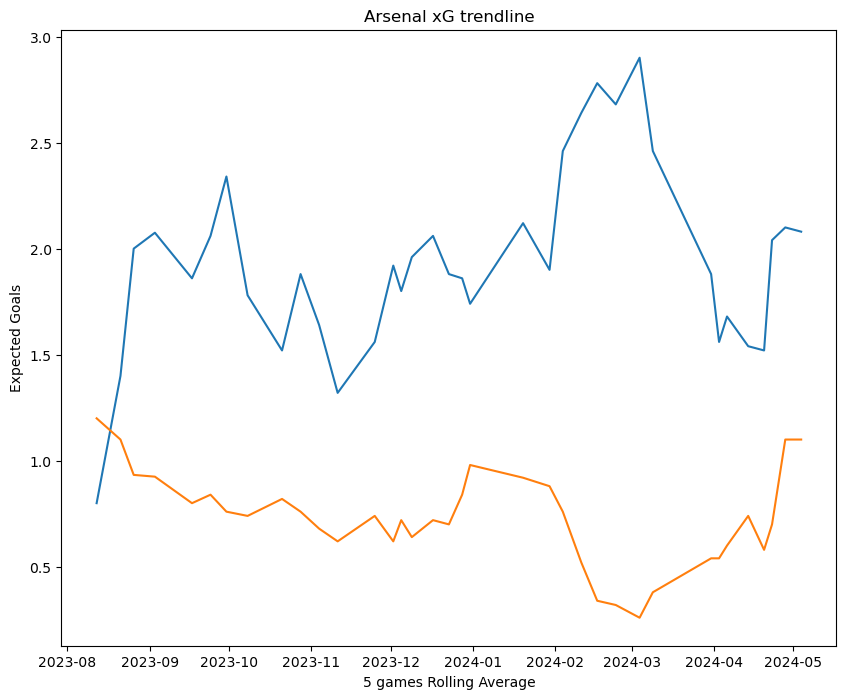

In [33]:
arsenal = matches[matches['team'] == 'Arsenal']

#arsenal_df['date'] = pd.to_datetime(arsenal_df['date'])

arsenal = arsenal.sort_values('date')

xgMean = arsenal['xg'].rolling(window=5, min_periods=1).mean()
xgaMean = arsenal['xga'].rolling(window=5, min_periods=1).mean()

fig, ax = plt.subplots(figsize = (10,8))

ax.plot(arsenal['date'], xgMean)
ax.plot(arsenal['date'], xgaMean)

ax.set_xlabel('5 games Rolling Average')
ax.set_ylabel('Expected Goals')
ax.set_title('Arsenal xG trendline')

plt.show()

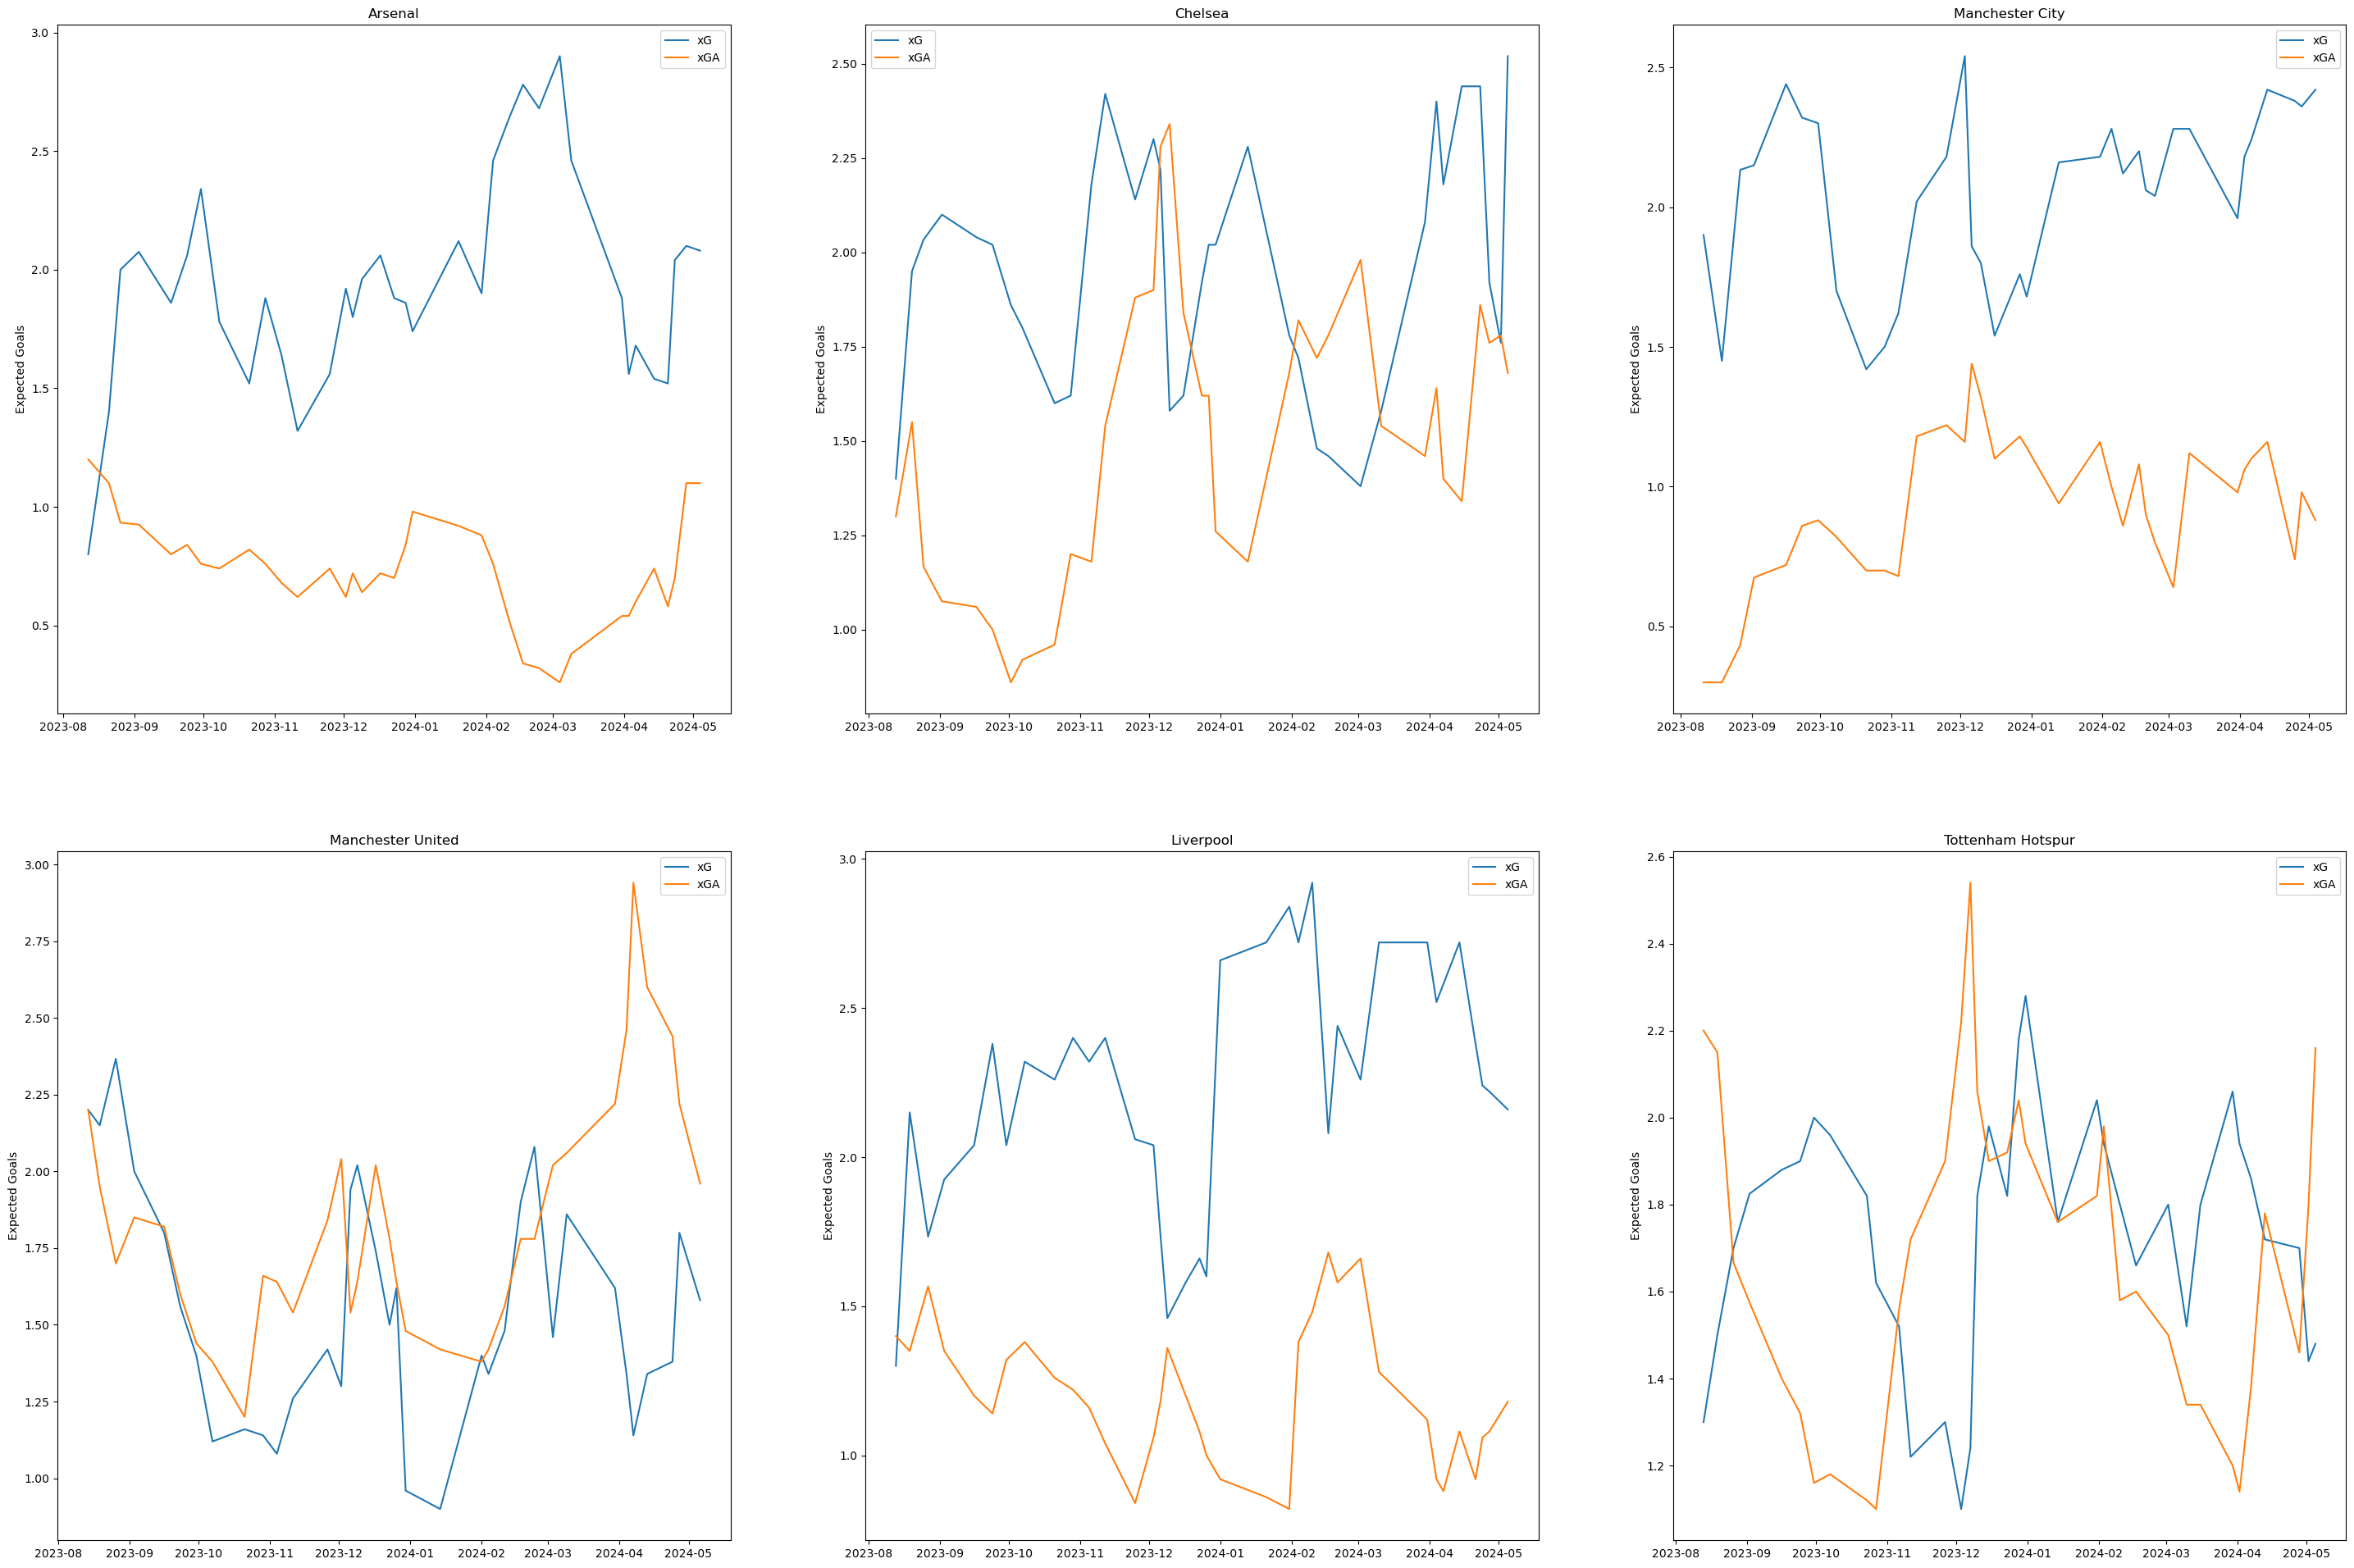

In [56]:
teams = ['Arsenal', 'Chelsea', 'Manchester City', 'Manchester United', 'Liverpool', 'Tottenham Hotspur']

fig, ax = plt.subplots(2, 3, figsize=(36, 24))
ax = ax.flatten()

for i, team in enumerate(teams):
    teamData = matches[matches['team'] == team]
    
    #teamData['date'] = pd.to_datetime(teamData['date'])
    teamData = teamData.sort_values('date')
    
    xgMean = teamData['xg'].rolling(window = 5, min_periods = 1).mean()
    xgaMean = teamData['xga'].rolling(window = 5, min_periods = 1).mean()

    ax[i].plot(teamData['date'], xgMean, label = 'xG')
    ax[i].plot(teamData['date'], xgaMean, label = 'xGA')
    
    ax[i].set_title(f'{team}')
    ax[i].set_ylabel('Expected Goals')
    ax[i].legend()

plt.show()